# Random Forest
* Topluluk öğrenme yöntemlerinin girişi. 
* Topluluk öğrenme yöntemleri , Birden fazla algoritmanın ya da birden fazla ağacaın bir araya gelerek toplu bir şekilde öğrenmesi ve tahmin etmeye çalışmasıdır. (Breiman 2001)
* Göz önünde bulundurulması gereken gözlemleri de rastgele seçme işlemini geliştirmiştir,
* Bagging ile Random Subspace(Ho,1998) yöntemlerinin birleşimi ile oluşturulmuştur.
-------------------
* Random subspace; bir değişken seti içerisinden rastgele değişken seç
----------------
* Ağaçlar için gözlemler bootstrap rastgele örnek seçimi yöntemi ile değişkenler random subspace yöntemi ile seçilir.
* Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasındanrastgele seçilen daha az sayıdaki değişken arasından seçilir.
* Ağaç oluşturmada veri setinin 2/3' ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.
* Her düğüm noktasında rastgele değişken seçimi yapılır. regresyon'da p/3, sınıflama'da karekök p)
-----------------
### Bagging : Ağaca dayalı bir yöntemdir, Aynı CART gibi, Teöeli bootstrap(yerine koymalı seçme işlemi) yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. (Breiman 1996)
* Bagging bir metodolijidir.
* m adet gözlem birimi var, T adet ağaç iiçin n'er adet gözlem (n<m) bootstrap yöntemi ile seçilir.  T adet karar ağacı modelinin ürettiği T adet tahmin değerini bir araya getir.
* Bagging yöntemi ; RMSE yi düşürür. Doğru sınıflandırma oranını arttırır, Varyansı düşürür (ezberlemeye karşı dayanıklıdır)
* Bagging(Bootstrap agregation) ; rastgele örneklemler çek, bu örneklemlerin her birisine modeller kur ve bunları bir araya getir
------------------------
* Not: Breiman 1984(CART), Bagging(1996), Random Forest 2001

neccs library

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler ## standartlaStırma
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

 Model and prediction

In [2]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
y= df['Salary']
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) ## one hot encoding
X_= df.drop(['Salary', 'League', 'Division','NewLeague'], axis =1).astype('float64')
X= pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [13]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [14]:
 #max_depth, boostrap, max_features, max_leaf__nodes, min_samples_leaf, min_samples_split, n_estimators
?rf_model

Type:        RandomForestRegressor
String form: RandomForestRegressor(random_state=42)
Length:      100
File:        c:\users\ycanf\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

crite

In [15]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

 Tune
 * n_estimators
 * max_features
 * min_samples_split max_depth

In [22]:
rd_model= RandomForestRegressor()

In [25]:
rf_params = {'n_estimators': [200,500,1000,2000],
            'max_depth': range(1,10),
            'max_features': [1,2,5,10,100],
            'min_samples_split': [2,10,80,100]}

In [26]:
rf_cv_model= GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=3).fit(X_train,y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [18]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [31]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [39]:
rf_tuned_model = RandomForestRegressor(
 max_depth= 8 ,
 max_features =  2,
 min_samples_split=  2,
 n_estimators=200,random_state=42).fit(X_train,y_train)

In [40]:
y_pred= rf_tuned_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

### Değişken Önem Düzeyi

In [42]:
Importance = pd.DataFrame({'Importance': rf_tuned_model.feature_importances_*100},
                         index= X_train.columns)

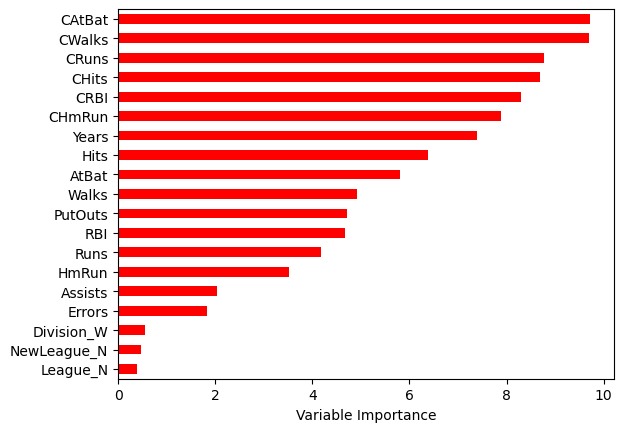

C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\ycanf\AppData\Local\Temp\joblib_memmapping_folder_17432_45e746755b054d8a8b7212191c765051_b69d2bbc53c145749f78e26e0cf0d7a1
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\ycanf\AppData\Local\Temp\joblib_memmapping_folder_17432_45e746755b054d8a8b7212191c765051_7d66d812f3b0497b8f0918ac28de61da
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\ycanf\AppData\Local\Temp\joblib_memmapping_folder_17432_018cddddb5694253935b13ca676f4236_d9ce4c5727ee47138c66057305a9f218
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\ycanf\anaconda3\Lib\site-packages\joblib\_memmapping

In [53]:
Importance.sort_values(by = 'Importance', axis = 0 , ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [51]:
rf_tuned_model.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])